In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Plot_curve(X,Y_arr,Y_legends,
                X_label,Y_label,
                title,marker_list,linestyle_list,
                bbox_to_anchor=(),
                dpi=400):
    #Plot parameters
    figsize = (8,6)
    fonttype = "Helvetica"
    fontsize = 10
    grid_linewidth = 0.8
    plot_linewidth = 1.5

    colors_list = ['green','mediumblue',
                   'tomato','orange',
                   'deepskyblue','lightskyblue',
                   'black','red']*2
    plt.figure(figsize=figsize)
    for idx in range(np.shape(Y_arr)[1]):
        plt.plot(X,Y_arr[:,idx],label=Y_legends[idx],
                    color=colors_list[idx], marker=marker_list[idx],
                    linestyle=linestyle_list[idx], linewidth=plot_linewidth)

    plt.rcParams["font.family"] = fonttype
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontproperties = fonttype, size = fontsize)
    plt.xticks(fontproperties = fonttype, size = fontsize)
    plt.ylabel(Y_label, fontdict={'family' : fonttype, 'size' : fontsize})
    plt.xlabel(X_label, fontdict={'family' : fonttype, 'size' : fontsize})
    plt.title(title)
    if len(bbox_to_anchor)>0:
        plt.legend(bbox_to_anchor=bbox_to_anchor, loc='lower left', borderaxespad=0)
    else:
        plt.legend(loc='best')
    plt.grid(linewidth=grid_linewidth, alpha=0.3)
    savename = "results/"+str(title)+".png"
    plt.savefig(savename,dpi=dpi)
    plt.tight_layout()
    plt.show()


In [3]:
def str2complex(s):
        str = s.replace(" ","")\
                .replace("(","")\
                .replace(")","")\
                .replace("i","j")
        return complex(str)


Plot the material dispersion of refractive index 

In [4]:
filename_SiN_Luke = "Si3N4_index_Luke.txt"
filename_SiN_Phi  = "Si3N4_index_Philips.txt"
filename_SiO2     = "SiO2_index.txt"

In [5]:
# index_SiN_Luke_arr = []
# with open(filename_SiN_Luke,'r') as f:
#     data_uncoupled = f.readlines()
#     for line in data_uncoupled:
#         wavl  = int(line.split()[0])
#         index = float(line.split()[1])
#         index_SiN_Luke_arr.append([wavl,index])
# index_SiN_Luke_arr  = np.array(index_SiN_Luke_arr)
# index_SiN_Luke_arr[:5]

In [6]:
# index_SiN_Philips_arr = []
# with open(filename_SiN_Phi,'r') as f:
#     data_uncoupled = f.readlines()
#     for line in data_uncoupled:
#         wavl  = int(line.split()[0])
#         index = float(line.split()[1])
#         index_SiN_Philips_arr.append([wavl,index])
# index_SiN_Philips_arr  = np.array(index_SiN_Philips_arr)
# index_SiN_Philips_arr[:5]

In [7]:
# wavl_vec = index_SiN_Philips_arr[:,0]
# Y_data = np.c_[index_SiN_Philips_arr[:,1:],index_SiN_Luke_arr[:,1:]]
# Plot_curve(wavl_vec,Y_data,
#             Y_legends=['Si3N4(Philips)','Si3N4(Luke)'],
#             X_label='wavelength(nm)',Y_label='refractive index',
#             title = "Refractive index of Si3N4 of different models ",
#             marker_list=[".","."],
#             linestyle_list=["-","-","-","-","--","--"])

Plot the propagation constant data calculated using CMT and Lumerical

In [8]:
wavl_vec = np.linspace(1.54,1.56,21).reshape(21,1)

filename_uncoupled_gap4um = "results/L_inner_8um_gapx_5&4um/gapx_4um/beta_uncoupled_L_inner_8um_gapx_4um_using_FDE@gap4um.txt"
filename_coupled_gap4um = "results/L_inner_8um_gapx_5&4um/gapx_4um/beta_coupled_L_inner_8um_gapx_4um_using_FDE@gap4um.txt"

filename_uncoupled_gap5um = "results/L_inner_8um_gapx_5&4um/gapx_5um/beta_uncoupled_L_inner_8um_gapx_5um.txt"
filename_coupled_gap5um = "results/L_inner_8um_gapx_5&4um/gapx_5um/beta_coupled_L_inner_8um_gapx_5um.txt"

# filename_uncoupled_pre = "results/L_inner_8um_gapx_5&4um/gapx_4um/beta_uncoupled_L_inner_8um_gapx_4um_using_FDE@gap5um.txt"
# filename_coupled_pre = "results/L_inner_8um_gapx_5&4um/gapx_4um/beta_coupled_L_inner_8um_gapx_4um_using_FDE@gap5um.txt"
# filename_lumerical = "results/L_inner_8um_gapx_5&4um/gapx_4um/Lumerical_supermodes_results_gapx_4um_meshoverride.txt"

filename_lumerical_gap4um = "results/L_inner_8um_gapx_5&4um/gapx_4um/Lumerical_supermodes_results_gapx_4um_meshoverride.txt"
filename_lumerical_gap5um = "results/L_inner_8um_gapx_5&4um/gapx_5um/Lumerical_supermodes_results_gapx_5um.txt"

filename_uncoupled_L_inner_2_8 = "results/beta_uncoupled_L_inner_2_8um_gap_8um.txt"
filename_coupled_L_inner_2_8 = "results/beta_coupled_L_inner_2_8um_gap_8um.txt"


In [9]:
# filename_uncoupled = "results/beta_uncoupled_gapy_4um.txt"
# filename_coupled = "results/beta_coupled_gapy_4um.txt"
# filename_lumerical = "data/Lumerical_supermodes_results_L_inner_2_8um_gap_3um.txt"

In [10]:
def Load_uncoupled_data(filename_uncoupled):
    beta_uncoupled_arr = []
    with open(filename_uncoupled,'r') as f:
        data_uncoupled = f.readlines()
        for line in data_uncoupled[1:]:
            beta_uncoupled_arr.append(np.float64(line.split(",")))
    beta_uncoupled_arr = np.array(beta_uncoupled_arr)
    return beta_uncoupled_arr

def Load_coupled_data_CMT(filename_coupled, wavl_idx = 10):
    beta_coupled_arr = []
    coeff_supermode_1_arr = []
    coeff_supermode_2_arr = []
    with open(filename_coupled,'r') as f:
        data_coupled = f.readlines()
        for line in data_coupled[1:]:
            line = line.split(",")
            line_float = np.float64(line[:3])
            if line_float[1]<0:
                beta_coupled = [line_float[0],line_float[2],line_float[1]]
            else:
                beta_coupled = line_float[:3]
            assert len(beta_coupled) == 3
            assert len(line) == 7
            coeff_supermode_1 = [str2complex(line[3]),str2complex(line[4])]
            coeff_supermode_2 = [str2complex(line[5]),str2complex(line[6])]
            beta_coupled_arr.append(beta_coupled)
            coeff_supermode_1_arr.append(coeff_supermode_1)
            coeff_supermode_2_arr.append(coeff_supermode_2)
    beta_coupled_arr = np.array(beta_coupled_arr, dtype = np.float64)
    coeff_supermode_1_arr = np.array(coeff_supermode_1_arr, dtype = np.complex64)
    coeff_supermode_2_arr = np.array(coeff_supermode_2_arr, dtype = np.complex64)

    # coefficient of supermode at 1550nm
    print("wavelength = {:.2f}".format(beta_coupled_arr[wavl_idx,0]) + " um "\
        + "\nSupermode 1 coefficient : "  \
        + 'A = ({0.real:.6f} + {0.imag:.6f}i)'.format(coeff_supermode_1_arr[wavl_idx,0]) + ', '\
        + 'B = ({0.real:.6f} + {0.imag:.6f}i)'.format(coeff_supermode_1_arr[wavl_idx,1])\
        + "\nSupermode 2 coefficient : "  \
        + 'A = ({0.real:.6f} + {0.imag:.6f}i)'.format(coeff_supermode_2_arr[wavl_idx,0]) + ', '\
        + 'B = ({0.real:.6f} + {0.imag:.6f}i)'.format(coeff_supermode_2_arr[wavl_idx,1]))

    return beta_coupled_arr

def Load_coupled_data_Lumerical(filename_lumerical):
    beta_coupled_lumerical_arr_ori = []
    with open(filename_lumerical,'r') as f:
        data_lumerical = f.readlines()
        beta_ang_mode1 = 0
        for line in data_lumerical[2:]:
            wavelength  = float(line.split(',')[0])/1000 #unit:um
            modeidx     = int(line.split(',')[1])
            neff        = str2complex(line.split(',')[2])
            ng          = str2complex(line.split(',')[3])
            loss        = float(line.split(',')[4])
            polarization= float(line.split(',')[5])
            beta_ang    = float(line.split(',')[6])

            if modeidx == 1:
                # Mode 1
                beta_ang_mode1 = beta_ang
            else:
                # Mode 2
                beta_ang_mode2 = beta_ang
                beta_coupled_lumerical_arr_ori.append([wavelength,beta_ang_mode1,beta_ang_mode2])

    beta_coupled_lumerical_arr_ori = np.array(beta_coupled_lumerical_arr_ori)
    # beta_ave = beta_uncoupled_arr[:,3]
    beta_ave = (beta_coupled_lumerical_arr_ori[:,1] + beta_coupled_lumerical_arr_ori[:,2])/2
    beta_coupled_lumerical_arr = np.copy(beta_coupled_lumerical_arr_ori)
    beta_coupled_lumerical_arr[:,1] = beta_coupled_lumerical_arr_ori[:,1] - beta_ave
    beta_coupled_lumerical_arr[:,2] = beta_coupled_lumerical_arr_ori[:,2] - beta_ave
    return beta_coupled_lumerical_arr

In [11]:
beta_uncoupled_arr_gap4um = Load_uncoupled_data(filename_uncoupled_gap4um)
beta_coupled_arr_gap4um = Load_coupled_data_CMT(filename_coupled_gap4um)
beta_coupled_lumerical_arr_gap4um = Load_coupled_data_Lumerical(filename_lumerical_gap4um)
# beta_coupled_lumerical_arr_gap4um[5:,:]

wavelength = 1.55 um 
Supermode 1 coefficient : A = (0.843349 + 0.000000i), B = (-0.567071 + -0.000000i)
Supermode 2 coefficient : A = (0.537366 + -0.000000i), B = (0.823669 + 0.000000i)


In [12]:
beta_uncoupled_arr_L_inner_2_8 = Load_uncoupled_data(filename_uncoupled_L_inner_2_8)
beta_coupled_arr_L_inner_2_8 = Load_coupled_data_CMT(filename_coupled_L_inner_2_8)

wavelength = 1.56 um 
Supermode 1 coefficient : A = (0.999977 + 0.000000i), B = (0.006731 + 0.000000i)
Supermode 2 coefficient : A = (-0.006758 + 0.000000i), B = (0.999977 + 0.000000i)


In [13]:
beta_uncoupled_arr_gap5um = Load_uncoupled_data(filename_uncoupled_gap5um)
beta_coupled_arr_gap5um = Load_coupled_data_CMT(filename_coupled_gap5um)
beta_coupled_lumerical_arr_gap5um = Load_coupled_data_Lumerical(filename_lumerical_gap5um)

wavelength = 1.55 um 
Supermode 1 coefficient : A = (0.833695 + 0.000000i), B = (-0.557328 + 0.000000i)
Supermode 2 coefficient : A = (0.552225 + -0.000000i), B = (0.830292 + 0.000000i)


In [14]:
# filename_inner = "data/Lumerical_supermodes_results_inner_isolated.txt"
# filename_outer = "data/Lumerical_supermodes_results_outer_isolated.txt"

# def readiso(filename):
#     beta_arr=[]
#     with open(filename,'r') as f:
#         data = f.readlines()
#         for line in data[1:]:
#             wavelength  = float(line.split(',')[0])/1000 #unit:um
#             modeidx     = int(line.split(',')[1])
#             neff        = str2complex(line.split(',')[2])
#             ng          = str2complex(line.split(',')[3])
#             loss        = float(line.split(',')[4])
#             polarization= float(line.split(',')[5])
#             beta_ang    = float(line.split(',')[6])
#             #The actual
#             if modeidx == 1:
#                 beta_arr.append([wavelength,beta_ang])
#             else:
#                 continue
#     beta_arr = np.array(beta_arr)
#     return beta_arr

# beta_inner_lumerical_arr = readiso(filename_inner)
# beta_outer_lumerical_arr = readiso(filename_outer)


# for idx in range(len(beta_inner_lumerical_arr)):
#     ave = (beta_inner_lumerical_arr[idx,1] + beta_outer_lumerical_arr[idx,1])/2
#     beta_inner_lumerical_arr[idx,1] = beta_inner_lumerical_arr[idx,1] - ave
#     beta_outer_lumerical_arr[idx,1] = beta_outer_lumerical_arr[idx,1] - ave

In [15]:
lambda_arr = beta_uncoupled_arr_gap4um[:,0] * 10**(-6)
lambda_arr[:5]

array([1.540e-06, 1.541e-06, 1.542e-06, 1.543e-06, 1.544e-06])

In [16]:
fre_arr = 3*10**8 / lambda_arr[:]
fre_arr

array([1.94805195e+14, 1.94678780e+14, 1.94552529e+14, 1.94426442e+14,
       1.94300518e+14, 1.94174757e+14, 1.94049159e+14, 1.93923723e+14,
       1.93798450e+14, 1.93673338e+14, 1.93548387e+14, 1.93423598e+14,
       1.93298969e+14, 1.93174501e+14, 1.93050193e+14, 1.92926045e+14,
       1.92802057e+14, 1.92678227e+14, 1.92554557e+14, 1.92431046e+14,
       1.92307692e+14])

In [17]:
# start_idx = 0
# end_idx = len(beta_uncoupled_arr)
# end_idx = 14
# beta_uncoupled_arr  = beta_uncoupled_arr[start_idx:end_idx,:]
# beta_coupled_arr    = beta_coupled_arr[start_idx:end_idx,:]
# beta_coupled_lumerical_arr    = beta_coupled_lumerical_arr[start_idx:end_idx,:]



# Y_data = np.c_[beta_uncoupled_arr_gap4um[:,1:3],
#                beta_uncoupled_arr_gap5um[:,1:3],
#                beta_coupled_arr_gap4um[:,1:],
#                beta_coupled_arr_gap5um[:,1:],
#                beta_coupled_lumerical_arr_gap4um[:,1:],
#                beta_coupled_lumerical_arr_gap5um[:,1:]]



In [18]:
# Plot_curve(beta_coupled_lumerical_arr[:,0],beta_coupled_lumerical_arr[:,1:],
#            Y_legends=['beta_uncoupled_of_inner_ring','beta_uncoupled_of_outer_ring',
#                       'beta_supermode_1_CMT','beta_supermode_2_CMT',
#                       'beta_supermode_1_Lumerical','beta_supermode_2_Lumerical',
#                       'beta_iso_inner','beta_iso_outer'],
#             X_label='wavelength(um)',Y_label='beta - beta_ave(rad\\rad)',
#             marker_list=["","",".",".","o","o","v","v"],
#             linestyle_list=["--","--","-","-","-","-","-","-"])

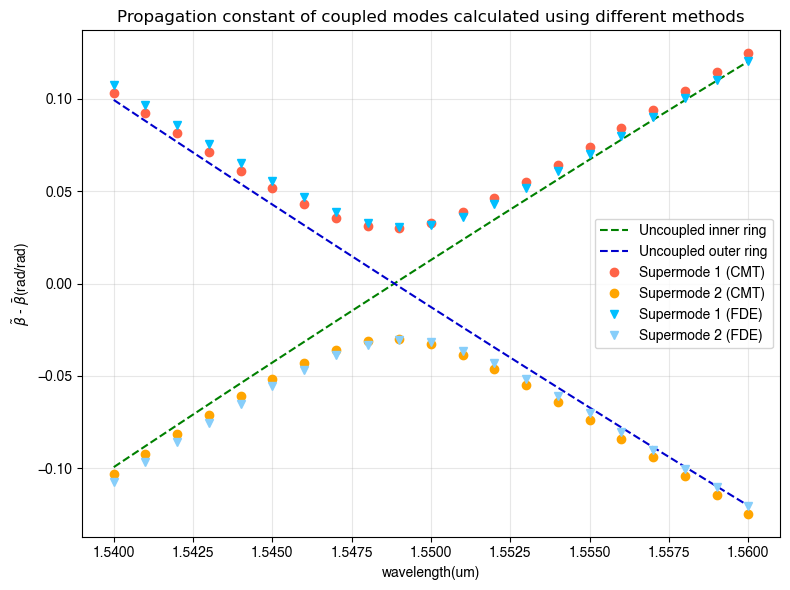

In [19]:
Y_data = np.c_[beta_uncoupled_arr_gap4um[:,1:3],
               beta_coupled_arr_gap4um[:,1:],
               beta_coupled_lumerical_arr_gap4um[:,1:]]

Plot_curve(lambda_arr*1e6,Y_data,
           Y_legends=['Uncoupled inner ring','Uncoupled outer ring',
                      'Supermode 1 (CMT)','Supermode 2 (CMT)',
                      'Supermode 1 (FDE)','Supermode 2 (FDE)',
                      'beta_iso_inner','beta_iso_outer'],
            X_label='wavelength(um)',
            Y_label=r'$ \tilde{\beta}$ - $\bar{\beta}$(rad/rad)',
            title = r"Propagation constant of coupled modes calculated using different methods",
            marker_list=["","","o","o","v","v"],
            linestyle_list=["--","--","","","",""])

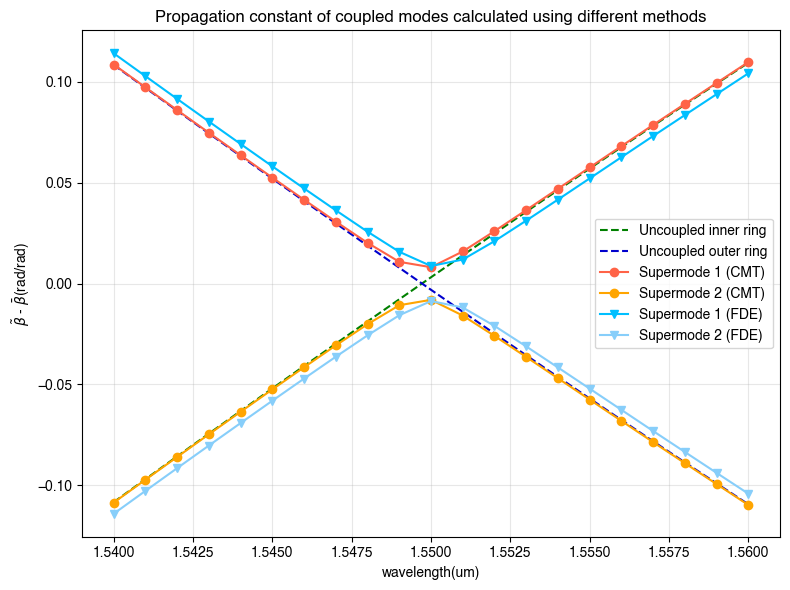

In [20]:
Y_data = np.c_[beta_uncoupled_arr_gap5um[:,1:3],
               beta_coupled_arr_gap5um[:,1:],
               beta_coupled_lumerical_arr_gap5um[:,1:]]

Plot_curve(lambda_arr*1e6,Y_data,
           Y_legends=['Uncoupled inner ring','Uncoupled outer ring',
                      'Supermode 1 (CMT)','Supermode 2 (CMT)',
                      'Supermode 1 (FDE)','Supermode 2 (FDE)',
                      'beta_iso_inner','beta_iso_outer'],
            X_label='wavelength(um)',
            Y_label=r'$ \tilde{\beta}$ - $\bar{\beta}$(rad/rad)',
            title = r"Propagation constant of coupled modes calculated using different methods",
            marker_list=["","","o","o","v","v"],
            linestyle_list=["--","--","-","-","-","-","-","-"])

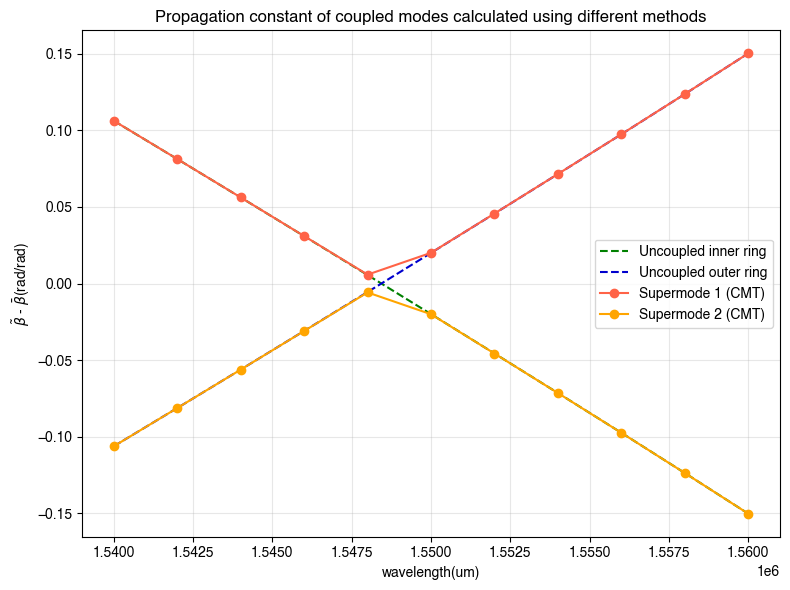

In [21]:
lambda_arr = np.linspace(1.54,1.56,11)
Y_data = np.c_[beta_uncoupled_arr_L_inner_2_8[:,1:3],
               beta_coupled_arr_L_inner_2_8[:,1:]]

Plot_curve(lambda_arr*1e6,Y_data,
           Y_legends=['Uncoupled inner ring','Uncoupled outer ring',
                      'Supermode 1 (CMT)','Supermode 2 (CMT)',
                      'Supermode 1 (FDE)','Supermode 2 (FDE)',
                      'beta_iso_inner','beta_iso_outer'],
            X_label='wavelength(um)',
            Y_label=r'$ \tilde{\beta}$ - $\bar{\beta}$(rad/rad)',
            title = r"Propagation constant of coupled modes calculated using different methods",
            marker_list=["","","o","o","v","v"],
            linestyle_list=["--","--","-","-","-","-","-","-"])

In [22]:
# Plot_curve(fre_arr,Y_data,
#            Y_legends=['beta_uncoupled_of_inner_ring','beta_uncoupled_of_outer_ring',
#                       'beta_supermode_1_CMT','beta_supermode_2_CMT',
#                       'beta_supermode_1_Lumerical','beta_supermode_2_Lumerical',
#                       'beta_iso_inner','beta_iso_outer'],
#             X_label='frequency(Hz)',Y_label='beta - beta_ave(rad\\rad)',
#             title = "Beta_ang calculated using different methods (frequency)"
#             , marker_list=["","",".",".","o","o","v","v"],
#             linestyle_list=["--","--","-","-","-","-","-","-"])

In [23]:
# Y_data = np.c_[np.zeros(np.shape(beta_uncoupled_arr[:,3])),
#                beta_uncoupled_arr_pre[:,3]-beta_uncoupled_arr[:,3],
#                (beta_coupled_lumerical_arr_ori[:,1] + beta_coupled_lumerical_arr_ori[:,2])/2-beta_uncoupled_arr[:,3]]


In [24]:
# Plot_curve(lambda_arr*1e6,Y_data,
#            Y_legends=[r'Beta_ave(Isolated WGs, using field data at gap=4$\mu$m)',
#                       r'Beta_ave(Isolated WGs, using field data at gap=5$\mu$m)',
#                       r'Beta_ave(FDE)',
#                       r'Beta_ave(Isolated Waveguides)'],
#             X_label='wavelength(um)',
#             Y_label=r'$ \tilde{\beta}$ - $\bar{\beta}$(rad/rad)',
#             title = r"Average propagation constant of coupled modes calculated using different eigenmodes data",
#             marker_list=["","","o","o","v","v"],
#             linestyle_list=["--","--","-","-","-","-","-","-"],
#             bbox_to_anchor=(0.1,0.2))

In [25]:
# field_coefficients = [A,B]     E_supermode = A * E_1 + B * E_2
# E_1,E_2 are the eigenmodes of separate WGs. A,B are the coefficients
def Plot_field_profile(self,field,field_name,Plot_log = False,
                    save_name='./results/field_supermode_profile.png',dpi=600):
    fonttype = "Helvetica"
    fontsize = 4
    grid_linewidth = 1
    colormap = "jet"
    figsize =  (15,5)

    fig, ax = plt.subplots(1,3,figsize=figsize,dpi=dpi)
    plt.subplots_adjust(left=0.05, right=0.95, wspace =0.1, hspace =0.2)   #调整子图间距

    name_list = ['Abs','Re','Im']

    field_list = [np.abs(field),np.real(field),np.imag(field)]
    if Plot_log:
        field_list[0] = np.log(field_list[0])
    # Converting the unit of ticks to um
    yticks_prev = np.linspace(0,np.shape(field)[0],10)
    xticks_prev = np.linspace(0,np.shape(field)[1],10)
    xticks,yticks = self.Convert_ticks(xticks_prev,yticks_prev)

    for idx in range(3):
        # Plot the field profile
        im = ax[idx].imshow(field_list[idx], cmap=colormap)
        # Plot the boundaries of the WGs
        ax[idx].plot(WG1_x_arr,WG1_y_arr,color='black', linewidth=0.1)
        ax[idx].plot(WG2_x_arr,WG2_y_arr,color='black', linewidth=0.1)

        ax[idx].set_title(name_list[idx]+'('+field_name+')')
        cbar = fig.colorbar(im, ax=ax[idx], orientation='vertical',
                            label='', shrink=0.3, pad=0.02)
        ax[idx].set_xticks(xticks_prev)
        ax[idx].set_xticklabels(xticks)
        ax[idx].set_yticks(yticks_prev)
        ax[idx].set_yticklabels(yticks)
        ax[idx].set_xlabel("X(um)",fontsize=4)
        ax[idx].set_ylabel("Y(um)",fontsize=4)
        ax[idx].invert_yaxis()
        ax[idx].tick_params(axis='both',labelsize=5)

    plt.rcParams["font.family"] = fonttype
    plt.rcParams.update({'font.size': fontsize})
    plt.legend()

    plt.savefig(save_name,dpi=dpi)
    plt.close()
    # plt.show()
    return

Calculate the Dispersion curve

In [26]:
# length of the arr will reduce by 2
def first_derivative_central_diff(y,x):
    # 计算差分
    dy = np.diff(y)  # y[i+1] - y[i]
    dx = np.diff(x)  # x[i+1] - x[i]

    # 中心差分
    dy_central = (y[2:] - y[:-2])  # y[i+1] - y[i-1]
    dx_central = (x[2:] - x[:-2])  # x[i+1] - x[i-1]

    # 计算导数
    derivative = dy_central / dx_central

    return derivative

In [27]:
# 定义二阶导数函数（非等间距）
def second_derivative_non_uniform(y, x):
    # 计算一阶差分
    dy_forward = (y[1:] - y[:-1]) / (x[1:] - x[:-1])  # 前向差分
    dy_backward = (y[1:] - y[:-1]) / (x[1:] - x[:-1])  # 后向差分

    # 计算二阶差分
    d2y = 2 * (dy_forward[1:] - dy_backward[:-1]) / (x[2:] - x[:-2])

    return d2y

In [28]:
c       = 3*10**8
um      = 10**-6
R_WG1   = 1000*um
R_WG2   = 1010.21*um

In [29]:
# Beta      : unit: rad/m
# wavl_arr  : unit: m
def Calculate_dispersion_D(Beta,wavl_arr):
    fre_arr = 3*10**8 / wavl_arr
    Beta_1  = first_derivative_central_diff(Beta, fre_arr)
    Beta_1  = Beta_1 *10**(12) * 10**(3)        # unit: ps/km
    D       = first_derivative_central_diff(Beta_1, wavl_arr[1:-1])
    D       = D * 10**(-9)                          # unit: ps/km/nm
    return D, Beta_1

In [30]:
beta_uncoupled_arr = beta_uncoupled_arr_gap4um
beta_coupled_arr = beta_coupled_arr_gap4um
beta_coupled_lumerical_arr = beta_coupled_lumerical_arr_gap4um

In [31]:
beta_uncoupled_WG1 = (beta_uncoupled_arr[:,1]+beta_uncoupled_arr[:,3])  / R_WG1     # unit: rad/m
beta_uncoupled_WG1

array([6074360.83973929, 6070117.71349744, 6065880.55539262,
       6061649.35272833, 6057424.09284465, 6053204.763116  ,
       6048991.35095393, 6044783.84380443, 6040582.22914974,
       6036386.49450628, 6032196.62742672, 6028012.6154984 ,
       6023834.44634314, 6019662.10761789, 6015495.58701468,
       6011334.87225907, 6007179.95111238, 6003030.81136867,
       5998886.14334253, 5994747.23855285, 5990614.08487004])

In [32]:
beta_uncoupled_WG2 = (beta_uncoupled_arr[:,2]+beta_uncoupled_arr[:,3])  / R_WG2     # unit: rad/m
beta_uncoupled_WG2[:5]
len(beta_uncoupled_WG2)

21

In [33]:
lambda_arr = np.linspace(1.54,1.56,21)

In [34]:
D_WG1, Beta_1_WG1 = Calculate_dispersion_D(beta_uncoupled_WG1,lambda_arr)
D_WG1

array([-3674.7399492 , -3668.47496226, -3662.22120341, -3655.98092161,
       -3649.75350291, -3643.5376343 , -3637.33377365, -3631.14388526,
       -3624.96631805, -3618.79937253, -3612.64614945, -3606.50563412,
       -3600.37688109, -3594.26054177,  -966.90714152,  1654.74751878,
        -978.518521  ])

In [35]:
D_WG2, Beta_1_WG2 = Calculate_dispersion_D(beta_uncoupled_WG2,lambda_arr)
len(D_WG2)

17

In [36]:
beta_CMT_supermode1 = (beta_coupled_arr[:,1] +
                              beta_uncoupled_arr[:,3])  / R_WG1     # unit: rad/m
beta_CMT_supermode2 = (beta_coupled_arr[:,2] +
                              beta_uncoupled_arr[:,3])  / R_WG2     # unit: rad/m

In [37]:
D_supermode_1, Beta_1_supermode_1 = Calculate_dispersion_D(beta_CMT_supermode1,lambda_arr)
D_supermode_1

array([ -5916.37424678,  -6825.27869788,  -8413.74627109, -11274.13502256,
       -16286.29135198, -23717.79984597, -30946.49114323, -32841.91035   ,
       -27690.86551   , -19662.02314826, -13186.26451026,  -9243.46712409,
        -7042.81951167,  -5802.74938276,  -2458.87087156,    602.72405471,
        -1734.43508623])

In [38]:
D_supermode_2, Beta_1_supermode_2 = Calculate_dispersion_D(beta_CMT_supermode2,lambda_arr)
len(D_supermode_2)

17

In [39]:
beta_lumerical_supermode1 = (beta_coupled_lumerical_arr[:,1] +
                             beta_uncoupled_arr[:,3])  / R_WG1    # unit: rad/m
beta_lumerical_supermode1[:5]

array([6074567.74235275, 6070302.30063989, 6066043.04879396,
       6061790.02869601, 6057543.31549013])

In [40]:
len(lambda_arr)

21

In [41]:
beta_coupled_lumerical_arr_ori  =\
np.c_[beta_coupled_lumerical_arr_gap4um[:,0],
      beta_coupled_lumerical_arr_gap4um[:,1]+beta_uncoupled_arr[:,3],
      beta_coupled_lumerical_arr_gap4um[:,2]+beta_uncoupled_arr[:,3]]
beta_coupled_lumerical_arr_ori

array([[1.54000000e+00, 6.07456774e+03, 6.07435258e+03],
       [1.54100000e+00, 6.07030230e+03, 6.07010895e+03],
       [1.54200000e+00, 6.06604305e+03, 6.06587116e+03],
       [1.54300000e+00, 6.06179003e+03, 6.06163913e+03],
       [1.54400000e+00, 6.05754332e+03, 6.05741278e+03],
       [1.54500000e+00, 6.05330304e+03, 6.05319193e+03],
       [1.54600000e+00, 6.04906946e+03, 6.04897632e+03],
       [1.54700000e+00, 6.04484303e+03, 6.04476547e+03],
       [1.54800000e+00, 6.04062454e+03, 6.04055854e+03],
       [1.54900000e+00, 6.03641510e+03, 6.03635441e+03],
       [1.55000000e+00, 6.03221545e+03, 6.03215232e+03],
       [1.55100000e+00, 6.02802514e+03, 6.02795267e+03],
       [1.55200000e+00, 6.02384304e+03, 6.02375661e+03],
       [1.55300000e+00, 6.01966816e+03, 6.01956507e+03],
       [1.55400000e+00, 6.01549992e+03, 6.01537861e+03],
       [1.55500000e+00, 6.01133799e+03, 6.01119755e+03],
       [1.55600000e+00, 6.00718216e+03, 6.00702206e+03],
       [1.55700000e+00, 6.00303

In [42]:
beta_coupled_lumerical_supermode1_ori  = beta_coupled_lumerical_arr_ori[:,1]  / ((R_WG1+R_WG2)/2)
beta_coupled_lumerical_supermode2_ori  = beta_coupled_lumerical_arr_ori[:,2]  / ((R_WG1+R_WG2)/2)
beta_coupled_lumerical_supermode1_ori

array([6043714.57942479, 6039470.80219468, 6035233.18339274,
       6031001.76468728, 6026776.62084073, 6022557.88635756,
       6018345.80740666, 6014140.83814789, 6009943.77335625,
       6005755.71388497, 6001577.39448691, 5997408.37449379,
       5993247.51100547, 5989093.83848997, 5984946.76895066,
       5980805.97077461, 5976671.25261596, 5972542.49760298,
       5968418.34237198, 5964300.0258641 , 5960187.50915163])

In [43]:
D_lumerical_supermode_1, Beta_1_lumerical_supermode_1 = Calculate_dispersion_D(beta_coupled_lumerical_supermode1_ori, lambda_arr)
D_lumerical_supermode_1

array([ -5676.24213341,  -6422.45395678,  -7696.69347769,  -9953.25359203,
       -13949.08412123, -20345.6291884 , -27938.03884058, -32353.2388835 ,
       -29934.79677876, -22688.9366344 , -15476.34102831, -10626.46014305,
        -7832.48670425,  -6259.95535532,  -2746.63044922,    405.67507213,
        -1854.68978709])

In [44]:
D_lumerical_supermode_2, Beta_1_lumerical_supermode_2 = Calculate_dispersion_D(beta_coupled_lumerical_supermode2_ori, lambda_arr)
D_lumerical_supermode_2

array([-2118.29432629, -1359.89764011,   -73.49483029,  2195.20229737,
        6203.14498184, 12611.77994781, 20216.25592755, 24643.49483721,
       22237.06822913, 15003.20300966,  7802.57518629,  2964.6375066 ,
         182.58441956, -1378.05078433,    77.09208777,  1880.96974704,
        -840.66944548])

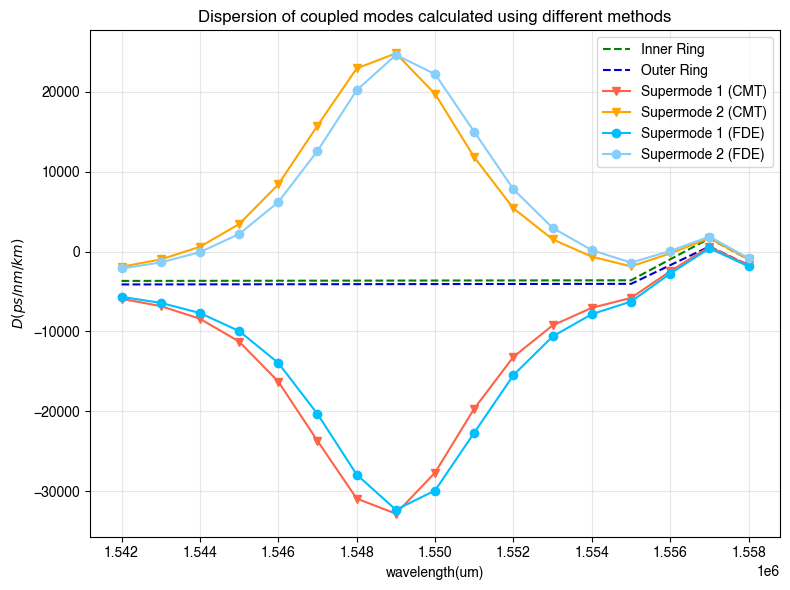

In [45]:
Y_data = np.c_[D_WG1, D_WG2, D_supermode_1, D_supermode_2,D_lumerical_supermode_1, D_lumerical_supermode_2 ]
Plot_curve(lambda_arr[2:-2] *10**(6) , Y_data,
           Y_legends=['Inner Ring','Outer Ring',
                      'Supermode 1 (CMT)','Supermode 2 (CMT)',
                      'Supermode 1 (FDE)','Supermode 2 (FDE)'],
            X_label='wavelength(um)',Y_label=r'$D(ps/nm/km)$',
            title = "Dispersion of coupled modes calculated using different methods",
            marker_list=["","","v","v","o","o","v","v"],
            linestyle_list=["--","--","-","-","-","-","-","-"])

In [46]:
np.linspace(1.54,1.56,11)

array([1.54 , 1.542, 1.544, 1.546, 1.548, 1.55 , 1.552, 1.554, 1.556,
       1.558, 1.56 ])